# Mardi Gras Routes Exploring

API Doc:  https://dev.socrata.com/foundry/data.nola.gov/tkeu-9s5e
Resource:  https://data.nola.gov/resource/tkeu-9s5e.json

General exploration of datasets expect this to be deleted

Seriously this is scratch work im just trying to figure out whats going on before i decide what to do

In [1]:
import geopandas  as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import os
import numpy as np
import shapely

In [2]:
path = f"{os.curdir}{os.sep}datasets{os.sep}"
path

'./datasets/'

In [3]:
data = gpd.read_file(f"{path}paradeRoutes.geojson")

<Axes: >

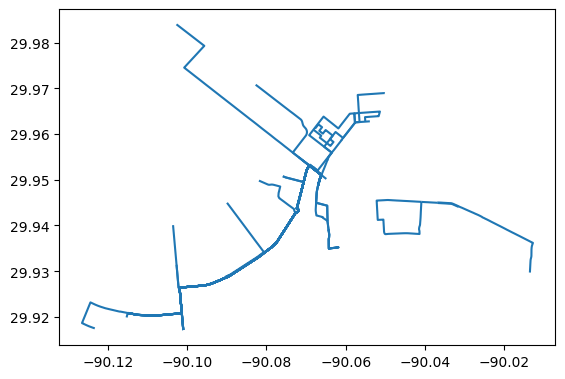

In [4]:
data.plot()

<GeoAxes: >

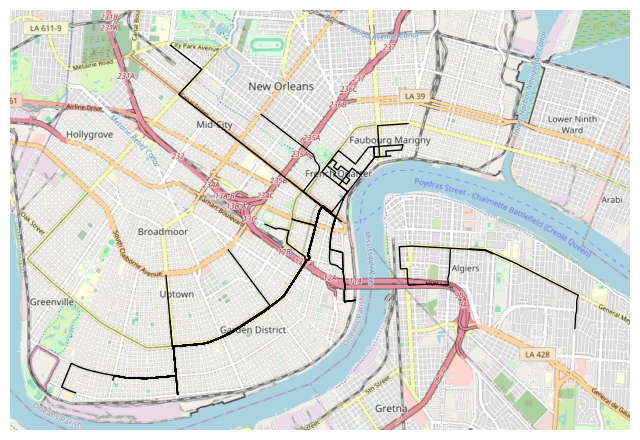

In [5]:
ax = gplt.webmap(data, projection=gcrs.WebMercator())
gplt.polyplot(data,ax=ax)

In [6]:
dataToilet = gpd.read_file(f"{path}toiletLocation.geojson")

<GeoAxes: >

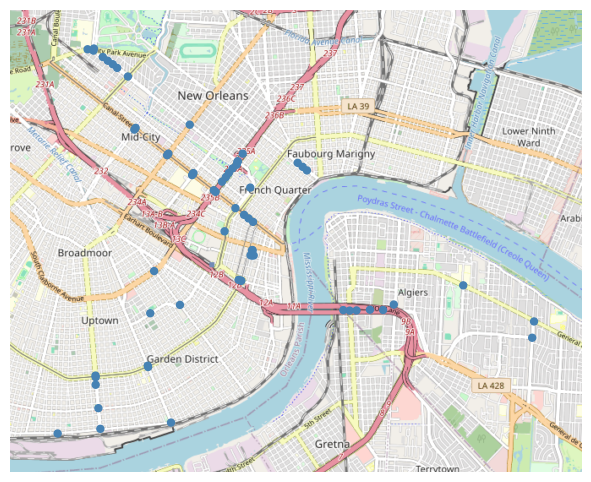

In [7]:
ax = gplt.webmap(dataToilet, projection=gcrs.WebMercator())
gplt.pointplot(dataToilet,ax=ax)

In [8]:
dataFirstAid = gpd.read_file(f"{path}firstAidLocations.geojson")

<GeoAxes: >

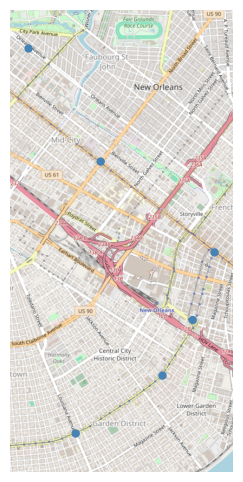

In [9]:
ax = gplt.webmap(dataFirstAid, projection=gcrs.WebMercator())
gplt.pointplot(dataFirstAid,ax=ax)

In [10]:
dataStreets = gpd.read_file(f"{path}streets.geojson")

In [11]:
dataStreets.head()

,munileft,mtfcc,strtetype,maintby,centerlineid,stateright,fromleft,joinid,roadlevel,lasteditor,...,ctyroute,astrtetype,msagleft,fedrtetype,afedrte,inwater,toleft,shape_stlength,fullnameabv,geometry
0,New Orleans,None,None,None,2501358,LA,6200,460,None,CMARD,...,None,None,None,None,None,None,6298,374.69106670567925,Constance St,"MULTILINESTRING ((-90.12482 29.92233, -90.1249..."
1,New Orleans,None,None,None,2507761,LA,2600,873,None,CMARD,...,None,None,None,None,None,None,2698,351.09598315083429,Hamilton St,"MULTILINESTRING ((-90.1272 29.96419, -90.12711..."
2,New Orleans,None,None,None,2510743,LA,0,671,None,CMARD,...,None,None,None,None,None,None,0,50.711363770514147,Encampment St,"MULTILINESTRING ((-90.08325 29.99944, -90.0832..."
3,New Orleans,None,None,None,2515776,LA,5461,1732,None,DBALBERT,...,None,None,None,None,None,None,5499,165.29887948728282,N Rampart St,"MULTILINESTRING ((-90.01771 29.96031, -90.0172..."
4,New Orleans,None,None,None,2522988,LA,10701,1704,None,CMARD,...,None,None,None,None,None,None,10731,252.75257190809734,Prentiss Ave,"MULTILINESTRING ((-89.96195 30.0232, -89.96185..."


In [12]:
dataStreets.shape

(28523, 39)

<GeoAxes: >

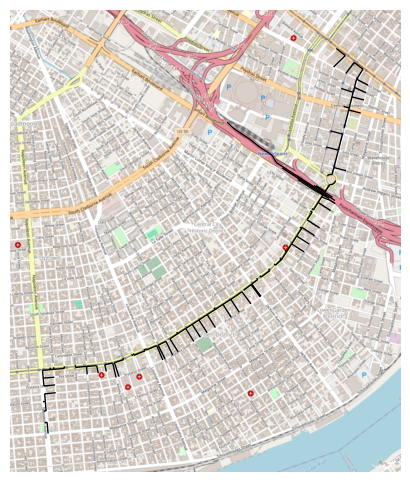

In [13]:
mask = dataStreets.intersects(data.loc[0,'geometry'])

ax = gplt.webmap(dataStreets[mask], projection=gcrs.WebMercator())
gplt.polyplot(dataStreets[mask], ax=ax)


In [14]:
dataStreets.columns

Index(['munileft', 'mtfcc', 'strtetype', 'maintby', 'centerlineid',
       'stateright', 'fromleft', 'joinid', 'roadlevel', 'lasteditor',
       'zipleft', 'roadclass', 'astrte', 'afedrtetype', 'lastupdate',
       'esnleft', 'objectid', 'fromright', 'esnright', 'ownedby', 'fullname',
       'onewaydir', 'toright', 'stroute', 'stateleft', 'zipright', 'fedroute',
       'muniright', 'msagright', 'ctyroute', 'astrtetype', 'msagleft',
       'fedrtetype', 'afedrte', 'inwater', 'toleft', 'shape_stlength',
       'fullnameabv', 'geometry'],
      dtype='object')

In [15]:
 pietyMask = dataStreets['fullnameabv'] == 'Piety Dr'

<GeoAxes: >

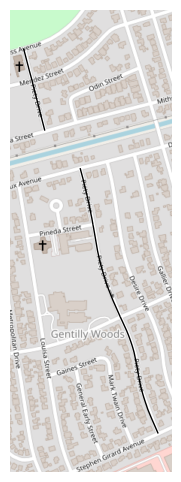

In [16]:
ax = gplt.webmap(dataStreets[pietyMask], projection=gcrs.WebMercator())
gplt.polyplot(dataStreets[pietyMask], ax=ax)

In [17]:
paradeStreets = dataStreets['fullnameabv'].isin( dataStreets[mask]['fullnameabv'].unique() )

In [20]:
data.columns

Index(['location', 'numfloats', 'formation', 'disband', 'objectid', 'date',
       'time', 'parade', 'shape_stlength', 'day', 'geometry'],
      dtype='object')

In [21]:
data['location'].unique

<bound method Series.unique of 0        Uptown
1        Uptown
2      Downtown
3        Uptown
4      Downtown
5        Uptown
6        Uptown
7        Uptown
8      Downtown
9        Uptown
10       Uptown
11       Uptown
12       Uptown
13       Uptown
14       Uptown
15       Uptown
16       Uptown
17       Uptown
18       Uptown
19       Uptown
20     Downtown
21       Uptown
22       Uptown
23      Midcity
24       Uptown
25       Uptown
26       Uptown
27       Uptown
28       Uptown
29       Uptown
30       Uptown
31       Uptown
32       Uptown
33       Uptown
34    West Bank
35       Uptown
36       Uptown
Name: location, dtype: object>

In [22]:
data['date']

0    2025-02-27 18:30:00+00:00
1    2025-02-21 18:00:00+00:00
2    2025-02-15 18:30:00+00:00
3    2025-03-01 12:30:00+00:00
4    2025-02-14 19:00:00+00:00
5    2025-02-28 18:30:00+00:00
6    2025-03-03 17:15:00+00:00
7    2025-02-22 14:00:00+00:00
8    2025-02-01 19:00:00+00:00
9    2025-03-02 17:15:00+00:00
10   2025-02-22 18:15:00+00:00
11   2025-02-28 19:00:00+00:00
12   2025-03-02 12:00:00+00:00
13   2025-03-03 18:00:00+00:00
14   2025-02-22 17:30:00+00:00
15   2025-02-27 17:15:00+00:00
16   2025-02-27 18:30:00+00:00
17   2025-02-22 15:30:00+00:00
18   2025-03-02 12:00:00+00:00
19   2025-02-21 17:30:00+00:00
20   2025-02-23 14:00:00+00:00
21   2025-02-26 19:00:00+00:00
22   2025-03-02 11:00:00+00:00
23   2025-03-01 16:00:00+00:00
24   2025-03-04 08:00:00+00:00
25   2025-03-04 11:00:00+00:00
26   2025-02-25 18:00:00+00:00
27   2025-02-25 18:30:00+00:00
28   2025-03-04 11:30:00+00:00
29   2025-03-01 11:00:00+00:00
30   2025-02-26 18:15:00+00:00
31   2025-02-28 17:30:00+00:00
32   202

In [25]:
dataStreets.columns

Index(['munileft', 'mtfcc', 'strtetype', 'maintby', 'centerlineid',
       'stateright', 'fromleft', 'joinid', 'roadlevel', 'lasteditor',
       'zipleft', 'roadclass', 'astrte', 'afedrtetype', 'lastupdate',
       'esnleft', 'objectid', 'fromright', 'esnright', 'ownedby', 'fullname',
       'onewaydir', 'toright', 'stroute', 'stateleft', 'zipright', 'fedroute',
       'muniright', 'msagright', 'ctyroute', 'astrtetype', 'msagleft',
       'fedrtetype', 'afedrte', 'inwater', 'toleft', 'shape_stlength',
       'fullnameabv', 'geometry'],
      dtype='object')

In [26]:
dataStreets['roadclass'].unique()

array(['Local', 'Major Arterial', 'Other', 'Umimproved', 'Ramp',
       'Freeway', 'Minor Arterial', None], dtype=object)

In [27]:
data = gpd.read_file("datasets/MississippiRiver.zip")

/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 3 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 4 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 5

In [28]:
groups = dataStreets.groupby(['fullnameabv','roadclass'])

In [29]:
outData = groups.apply(lambda df: shapely.ops.unary_union( df['geometry'] ), include_groups=False )

In [30]:
outData

fullnameabv     roadclass
10th St         Local        MULTILINESTRING ((-90.116232175619 29.99985101...
12th St         Local        MULTILINESTRING ((-90.119215749575 30.00082650...
14th St         Local        MULTILINESTRING ((-90.118915110425 30.00163629...
16th St         Local        MULTILINESTRING ((-90.118854599883 30.00246535...
18th St         Local        MULTILINESTRING ((-90.115983705612 30.00312910...
                                                   ...                        
Zircon St       Local        MULTILINESTRING ((-90.107711594126 30.02096346...
d'Abadie St     Local        MULTILINESTRING ((-90.073155728769 29.98038635...
d'Hemecourt St  Local        MULTILINESTRING ((-90.10979770695 29.973833572...
de Armas St     Local        MULTILINESTRING ((-90.023042667077 29.94271664...
de Battista Pl  Local        LINESTRING (-90.010514550399 29.94005173434, -...
Length: 2547, dtype: object

In [32]:
import matplotlib.pyplot as plt

In [33]:
plt.imread('./RouteMaps/Chewbacchus.svg')

UnidentifiedImageError: cannot identify image file './RouteMaps/Chewbacchus.svg'